## Setup: Import Libraries & Load Data

In [3]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Configure visualization settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Create outputs folder if it doesn't exist
os.makedirs('outputs', exist_ok=True)

# Load the placement data
df = pd.read_csv('placements.csv')

# Calculate Placement Rate
df['Placement_Rate'] = (df['Placed_Students'] / df['Total_Students']) * 100

# Filter out 'Overall' entries for branch-specific analysis
df_branches = df[df['Normalized_Branch'] != 'Overall'].copy()

print(f"✓ Data loaded: {len(df)} records")
print(f"✓ Unique Colleges: {df['College'].nunique()}")
print(f"✓ Unique Branches: {df_branches['Normalized_Branch'].nunique()}")
print(f"✓ Years covered: {sorted(df['Year'].unique())}")
print(f"\n✓ Outputs folder created at: {os.path.abspath('outputs')}")

✓ Data loaded: 75 records
✓ Unique Colleges: 7
✓ Unique Branches: 12
✓ Years covered: [np.int64(2023), np.int64(2024), np.int64(2025)]

✓ Outputs folder created at: c:\Users\saira\Desktop\ANUDIP project\outputs


---
## 1. Placement Rate by Field (Bar Chart)
**Calculate Placement Rate = Placed_Students / Total_Students × 100**

Shows which branch has the highest placement rate.

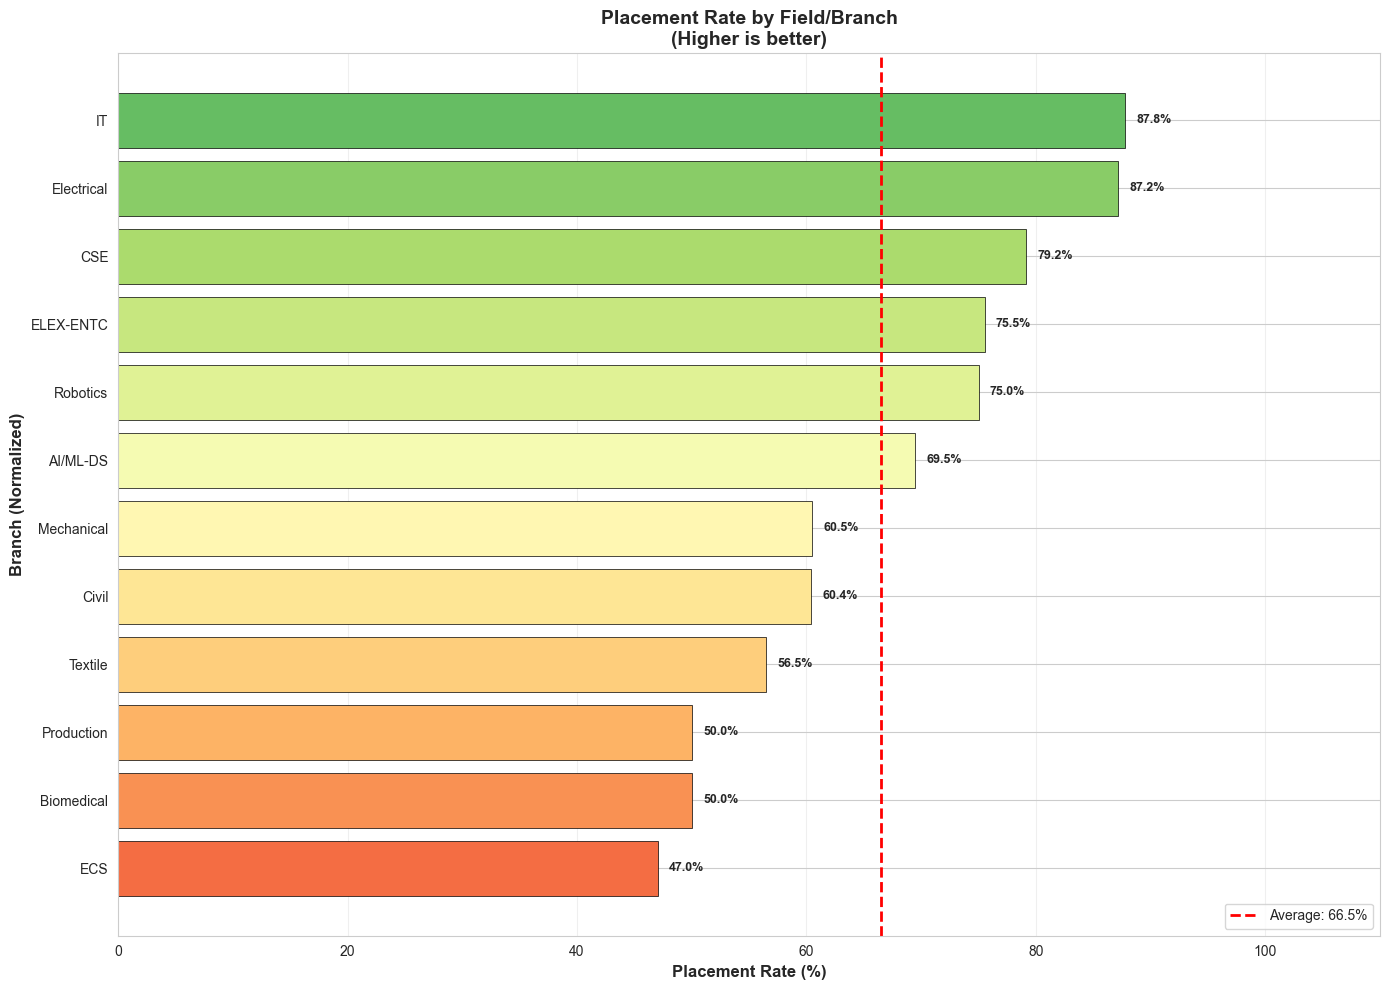


🏆 Highest Placement Rate: IT with 87.76%


In [4]:
# Aggregate placement rate by normalized branch
branch_placement = df_branches.groupby('Normalized_Branch').agg({
    'Total_Students': 'sum',
    'Placed_Students': 'sum'
}).reset_index()

branch_placement['Placement_Rate'] = (branch_placement['Placed_Students'] / branch_placement['Total_Students']) * 100
branch_placement = branch_placement.sort_values('Placement_Rate', ascending=True)

# Create bar chart
fig, ax = plt.subplots(figsize=(14, 10))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(branch_placement)))

bars = ax.barh(branch_placement['Normalized_Branch'], branch_placement['Placement_Rate'], color=colors, edgecolor='black', linewidth=0.5)

# Add value labels
for bar, rate in zip(bars, branch_placement['Placement_Rate']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{rate:.1f}%', 
            va='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Placement Rate (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Branch (Normalized)', fontsize=12, fontweight='bold')
ax.set_title('Placement Rate by Field/Branch\n(Higher is better)', fontsize=14, fontweight='bold')
ax.set_xlim(0, 110)
ax.axvline(x=branch_placement['Placement_Rate'].mean(), color='red', linestyle='--', linewidth=2, label=f'Average: {branch_placement["Placement_Rate"].mean():.1f}%')
ax.legend(loc='lower right')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/01_placement_rate_by_field.png', dpi=150, bbox_inches='tight')
plt.show()

# Show top branch
top_branch = branch_placement.iloc[-1]
print(f"\n🏆 Highest Placement Rate: {top_branch['Normalized_Branch']} with {top_branch['Placement_Rate']:.2f}%")

---
## 2. Average Package Comparison by Field (Bar/Column Chart)
Compare Avg_Package_LPA across all normalized branches.

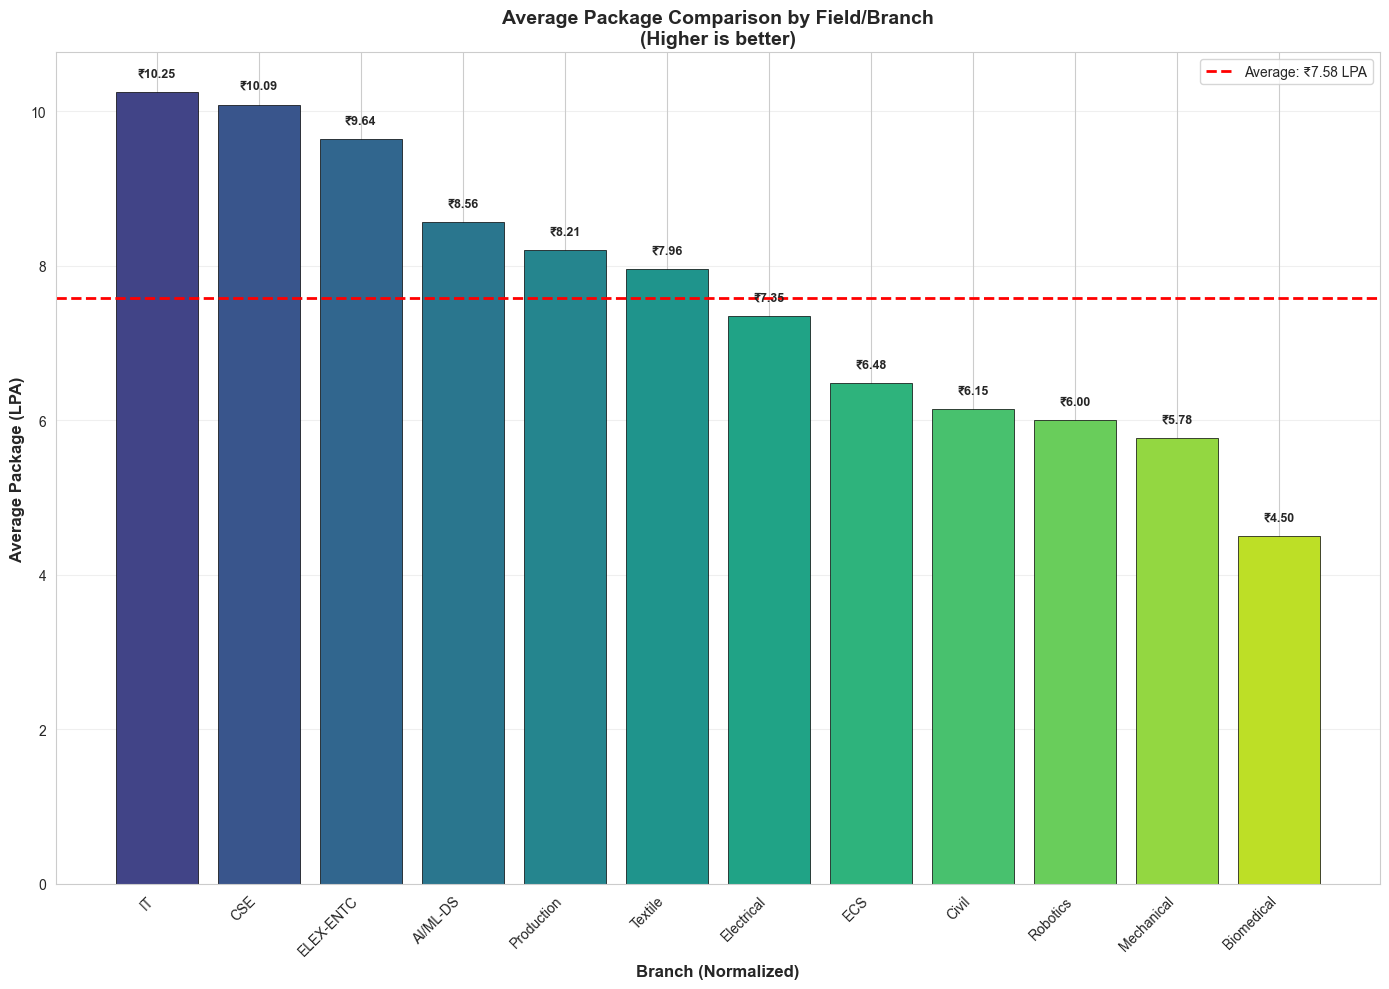


🏆 Highest Avg Package: IT with ₹10.25 LPA
📉 Lowest Avg Package: Biomedical with ₹4.50 LPA


In [5]:
# Aggregate average package by normalized branch
branch_package = df_branches.groupby('Normalized_Branch').agg({
    'Avg_Package_LPA': 'mean',
    'Total_Students': 'sum'
}).reset_index()

branch_package = branch_package.sort_values('Avg_Package_LPA', ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(14, 10))
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(branch_package)))

bars = ax.bar(range(len(branch_package)), branch_package['Avg_Package_LPA'], 
              color=colors, edgecolor='black', linewidth=0.5)

# Add value labels
for i, (bar, pkg) in enumerate(zip(bars, branch_package['Avg_Package_LPA'])):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, f'₹{pkg:.2f}', 
            ha='center', fontsize=9, fontweight='bold', rotation=0)

ax.set_xticks(range(len(branch_package)))
ax.set_xticklabels(branch_package['Normalized_Branch'], rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Average Package (LPA)', fontsize=12, fontweight='bold')
ax.set_xlabel('Branch (Normalized)', fontsize=12, fontweight='bold')
ax.set_title('Average Package Comparison by Field/Branch\n(Higher is better)', fontsize=14, fontweight='bold')
ax.axhline(y=branch_package['Avg_Package_LPA'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Average: ₹{branch_package["Avg_Package_LPA"].mean():.2f} LPA')
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/02_avg_package_by_field.png', dpi=150, bbox_inches='tight')
plt.show()

# Show top and bottom branches
print(f"\n🏆 Highest Avg Package: {branch_package.iloc[0]['Normalized_Branch']} with ₹{branch_package.iloc[0]['Avg_Package_LPA']:.2f} LPA")
print(f"📉 Lowest Avg Package: {branch_package.iloc[-1]['Normalized_Branch']} with ₹{branch_package.iloc[-1]['Avg_Package_LPA']:.2f} LPA")

---
## 3. College-wise Placement Rate (Grouped Bar Chart)
X-axis: College | Grouped bars for each branch showing placement rate.

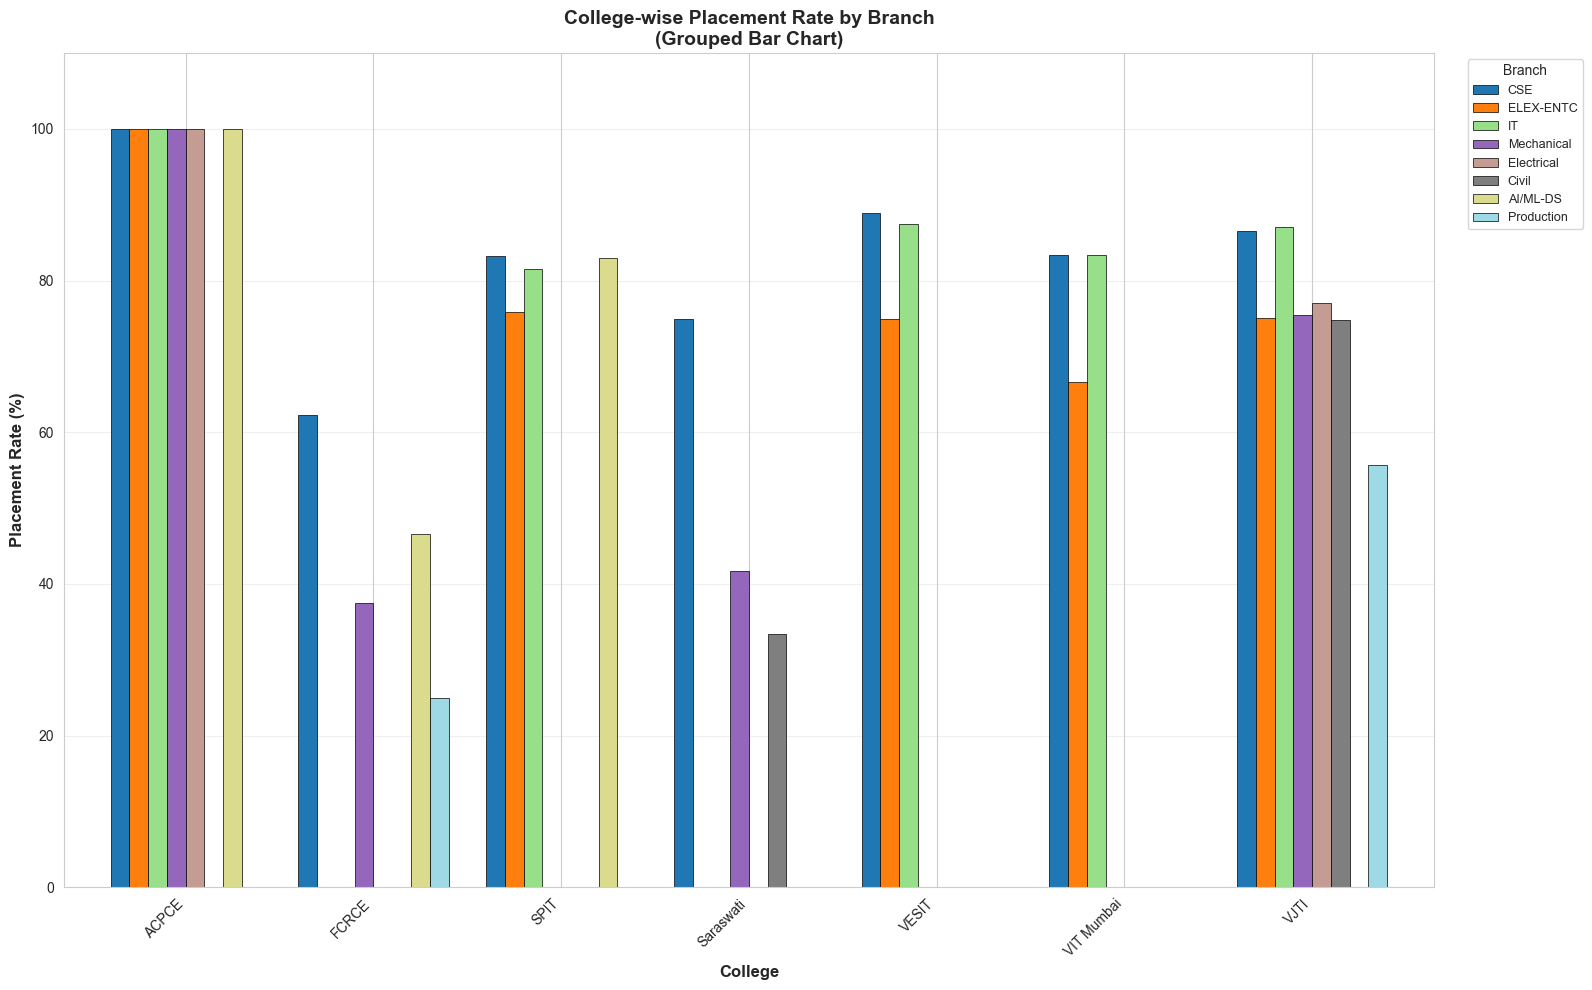


📊 Top 8 branches by total students are shown for clarity.


In [6]:
# Create pivot table for college vs branch placement rates
college_branch_rate = df_branches.groupby(['College', 'Normalized_Branch']).agg({
    'Total_Students': 'sum',
    'Placed_Students': 'sum'
}).reset_index()

college_branch_rate['Placement_Rate'] = (college_branch_rate['Placed_Students'] / college_branch_rate['Total_Students']) * 100

# Pivot for grouped bar chart
pivot_rate = college_branch_rate.pivot(index='College', columns='Normalized_Branch', values='Placement_Rate')

# Select top branches for cleaner visualization
top_branches = df_branches.groupby('Normalized_Branch')['Total_Students'].sum().nlargest(8).index.tolist()
pivot_rate_filtered = pivot_rate[top_branches].dropna(how='all')

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(16, 10))
pivot_rate_filtered.plot(kind='bar', ax=ax, width=0.8, colormap='tab20', edgecolor='black', linewidth=0.5)

ax.set_xlabel('College', fontsize=12, fontweight='bold')
ax.set_ylabel('Placement Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('College-wise Placement Rate by Branch\n(Grouped Bar Chart)', fontsize=14, fontweight='bold')
ax.legend(title='Branch', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylim(0, 110)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/03_college_wise_placement_rate.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Top 8 branches by total students are shown for clarity.")

---
## 4. Year-wise Trend (Line Chart)
Show placement rate and/or average package trends from 2023 → 2024 → 2025.

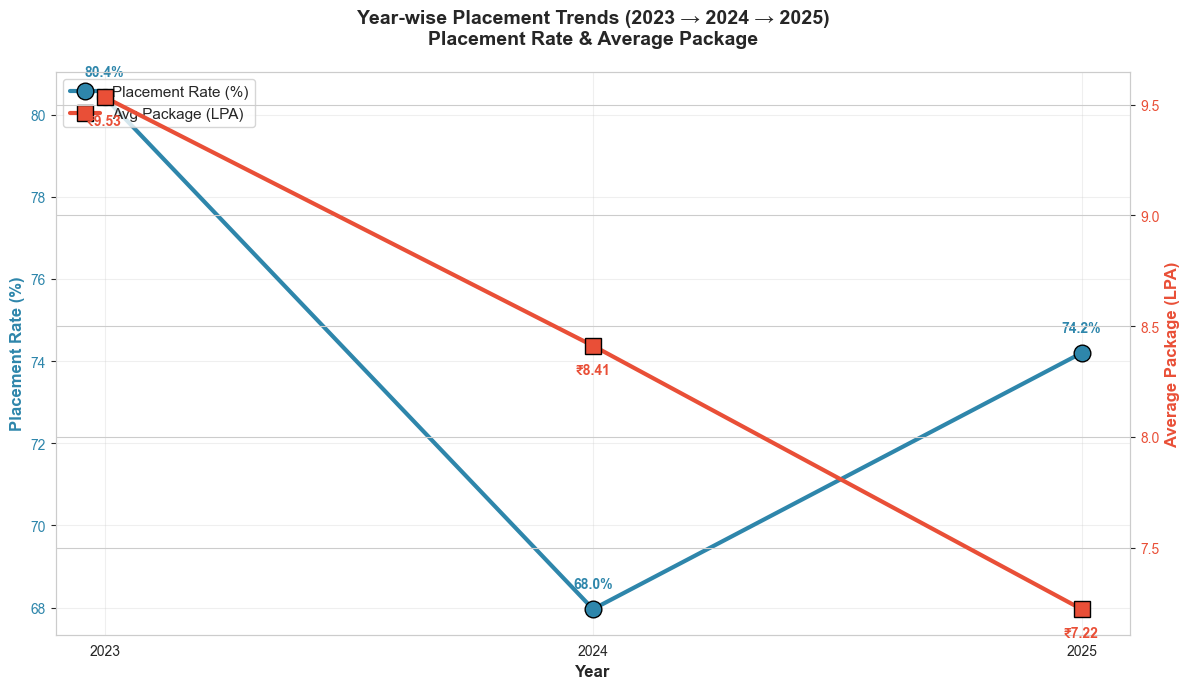


📈 Year-wise Summary:
  2023: 80.4% placement rate, ₹9.53 LPA avg package
  2024: 68.0% placement rate, ₹8.41 LPA avg package
  2025: 74.2% placement rate, ₹7.22 LPA avg package


In [7]:
# Aggregate by year
year_stats = df_branches.groupby('Year').agg({
    'Total_Students': 'sum',
    'Placed_Students': 'sum',
    'Avg_Package_LPA': 'mean'
}).reset_index()

year_stats['Placement_Rate'] = (year_stats['Placed_Students'] / year_stats['Total_Students']) * 100

# Create dual-axis line chart
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Placement Rate
color1 = '#2E86AB'
ax1.plot(year_stats['Year'], year_stats['Placement_Rate'], marker='o', linewidth=3, 
         markersize=12, color=color1, label='Placement Rate (%)', markeredgecolor='black')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Placement Rate (%)', fontsize=12, fontweight='bold', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(year_stats['Year'])

# Add second y-axis for package
ax2 = ax1.twinx()
color2 = '#E94F37'
ax2.plot(year_stats['Year'], year_stats['Avg_Package_LPA'], marker='s', linewidth=3, 
         markersize=12, color=color2, label='Avg Package (LPA)', markeredgecolor='black')
ax2.set_ylabel('Average Package (LPA)', fontsize=12, fontweight='bold', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add value annotations
for i, row in year_stats.iterrows():
    ax1.annotate(f'{row["Placement_Rate"]:.1f}%', (row['Year'], row['Placement_Rate']), 
                 textcoords="offset points", xytext=(0, 15), ha='center', fontsize=10, color=color1, fontweight='bold')
    ax2.annotate(f'₹{row["Avg_Package_LPA"]:.2f}', (row['Year'], row['Avg_Package_LPA']), 
                 textcoords="offset points", xytext=(0, -20), ha='center', fontsize=10, color=color2, fontweight='bold')

plt.title('Year-wise Placement Trends (2023 → 2024 → 2025)\nPlacement Rate & Average Package', 
          fontsize=14, fontweight='bold', pad=20)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

ax1.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/04_yearwise_trend.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📈 Year-wise Summary:")
for _, row in year_stats.iterrows():
    print(f"  {int(row['Year'])}: {row['Placement_Rate']:.1f}% placement rate, ₹{row['Avg_Package_LPA']:.2f} LPA avg package")

---
## 5. Field Popularity vs Placement (Scatter Plot)
X-axis: Total Students | Y-axis: Placement Rate | Bubble size: Total Students (optional)

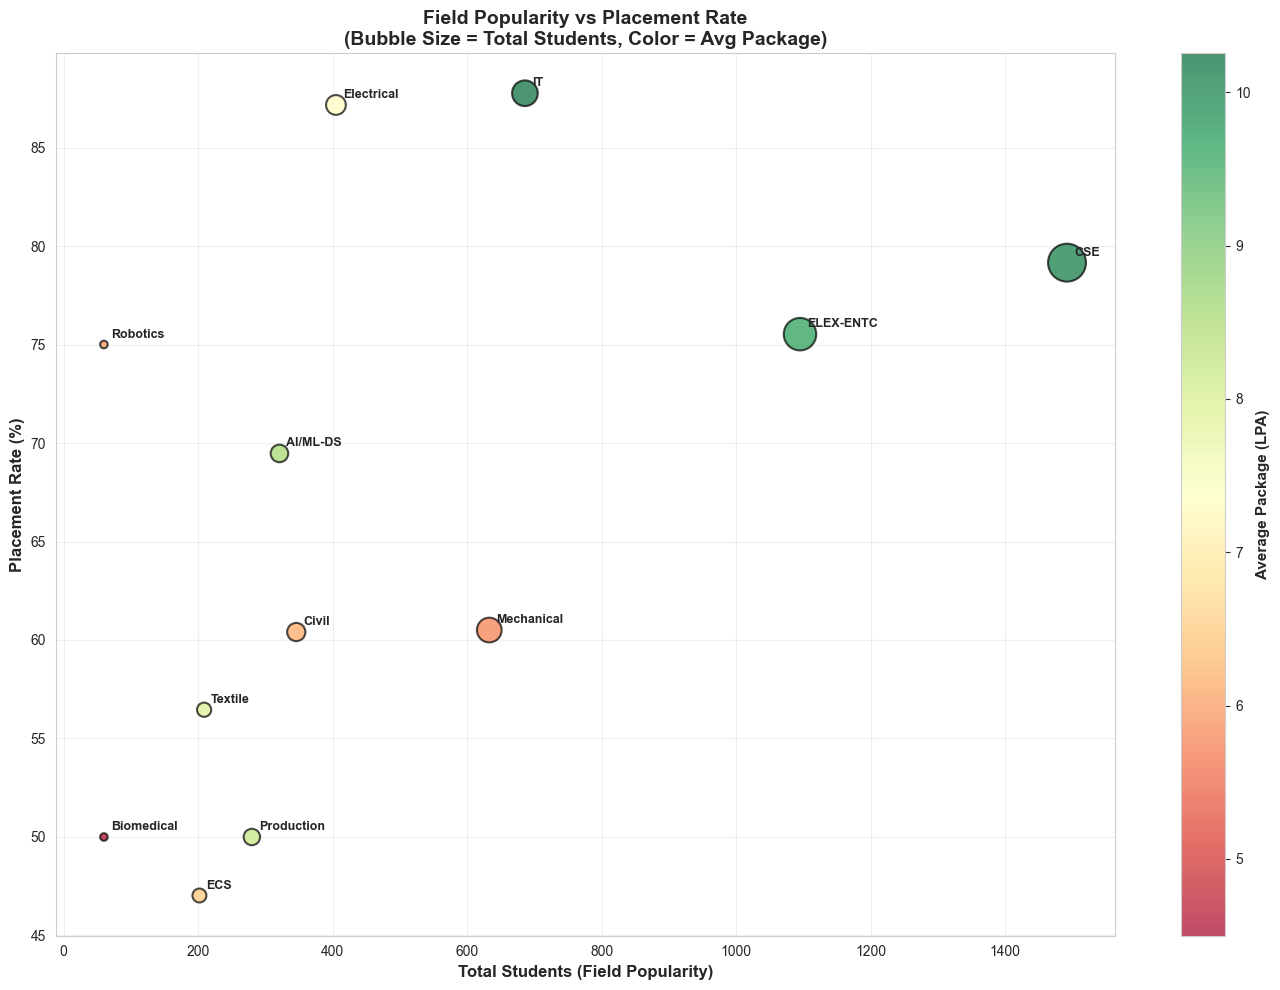


🔍 Insight: Larger bubbles = More popular branches
   Green color = Higher average packages


In [8]:
# Aggregate by branch
branch_scatter = df_branches.groupby('Normalized_Branch').agg({
    'Total_Students': 'sum',
    'Placed_Students': 'sum',
    'Avg_Package_LPA': 'mean'
}).reset_index()

branch_scatter['Placement_Rate'] = (branch_scatter['Placed_Students'] / branch_scatter['Total_Students']) * 100

# Create scatter plot
fig, ax = plt.subplots(figsize=(14, 10))

scatter = ax.scatter(branch_scatter['Total_Students'], 
                     branch_scatter['Placement_Rate'],
                     s=branch_scatter['Total_Students']/2,  # Bubble size
                     c=branch_scatter['Avg_Package_LPA'],   # Color by package
                     cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=1.5)

# Add labels for each point
for _, row in branch_scatter.iterrows():
    ax.annotate(row['Normalized_Branch'], 
                (row['Total_Students'], row['Placement_Rate']),
                textcoords="offset points", xytext=(5, 5), fontsize=9, fontweight='bold')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Package (LPA)', fontsize=11, fontweight='bold')

ax.set_xlabel('Total Students (Field Popularity)', fontsize=12, fontweight='bold')
ax.set_ylabel('Placement Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Field Popularity vs Placement Rate\n(Bubble Size = Total Students, Color = Avg Package)', 
             fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/05_field_popularity_vs_placement.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔍 Insight: Larger bubbles = More popular branches")
print("   Green color = Higher average packages")

---
## 6. Average Package Trend by College (Line Chart)
Show how the average package changes year-wise for each college.

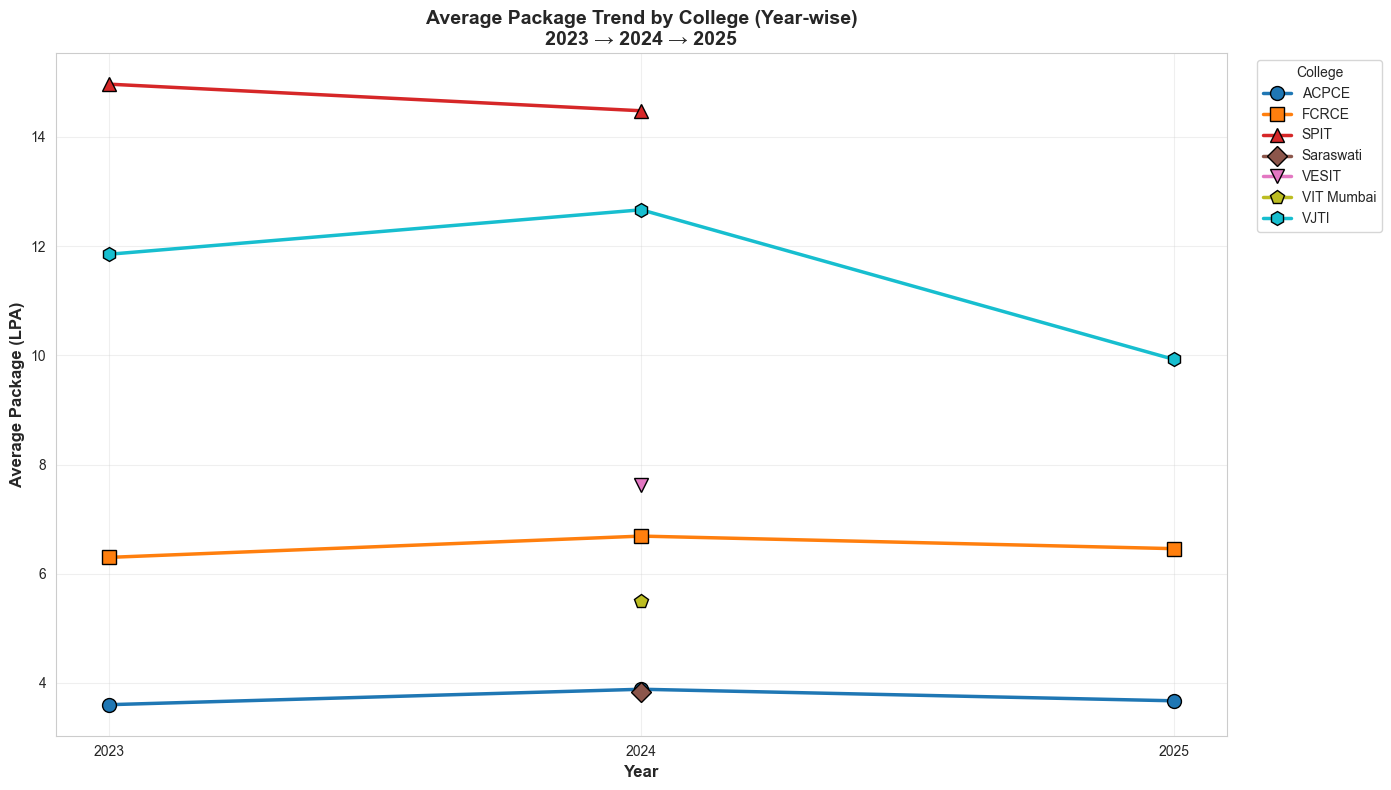


📊 Package Trends Summary:
  📈 ACPCE: ₹3.60 → ₹3.67 (+0.07 LPA)
  📈 FCRCE: ₹6.30 → ₹6.46 (+0.16 LPA)
  📉 SPIT: ₹14.97 → ₹14.48 (-0.49 LPA)
  📉 VJTI: ₹11.85 → ₹9.93 (-1.92 LPA)


In [9]:
# Aggregate by college and year
college_year_pkg = df_branches.groupby(['College', 'Year']).agg({
    'Avg_Package_LPA': 'mean'
}).reset_index()

# Pivot for line chart
pivot_pkg = college_year_pkg.pivot(index='Year', columns='College', values='Avg_Package_LPA')

# Create line chart
fig, ax = plt.subplots(figsize=(14, 8))

colors = plt.cm.tab10(np.linspace(0, 1, len(pivot_pkg.columns)))
markers = ['o', 's', '^', 'D', 'v', 'p', 'h', '*']

for i, college in enumerate(pivot_pkg.columns):
    ax.plot(pivot_pkg.index, pivot_pkg[college], marker=markers[i % len(markers)], 
            linewidth=2.5, markersize=10, label=college, color=colors[i], markeredgecolor='black')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Package (LPA)', fontsize=12, fontweight='bold')
ax.set_title('Average Package Trend by College (Year-wise)\n2023 → 2024 → 2025', fontsize=14, fontweight='bold')
ax.set_xticks(pivot_pkg.index)
ax.legend(title='College', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/06_avg_package_trend_by_college.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Package Trends Summary:")
for college in pivot_pkg.columns:
    vals = pivot_pkg[college].dropna()
    if len(vals) > 1:
        change = vals.iloc[-1] - vals.iloc[0]
        symbol = '📈' if change > 0 else '📉'
        print(f"  {symbol} {college}: ₹{vals.iloc[0]:.2f} → ₹{vals.iloc[-1]:.2f} ({change:+.2f} LPA)")

---
## 7. Heatmap: Colleges vs Average Package
Rows = Colleges | Columns = Normalized Branch | Values = Avg Package

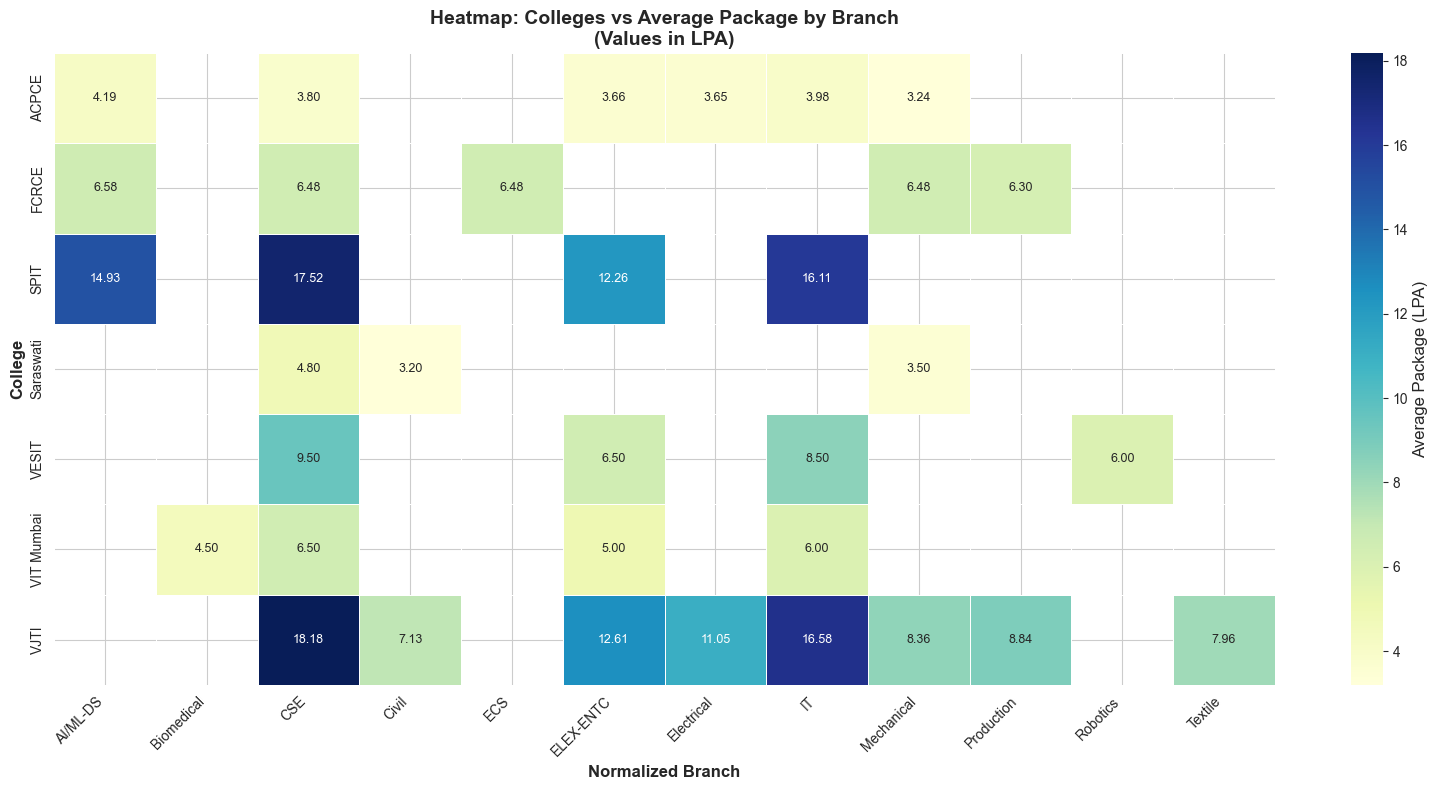


🔥 Darker blue = Higher average package
   White/NaN = No data for that combination


In [10]:
# Create pivot table for heatmap
heatmap_pkg = df_branches.groupby(['College', 'Normalized_Branch'])['Avg_Package_LPA'].mean().reset_index()
heatmap_pkg_pivot = heatmap_pkg.pivot(index='College', columns='Normalized_Branch', values='Avg_Package_LPA')

# Create heatmap
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(heatmap_pkg_pivot, annot=True, fmt='.2f', cmap='YlGnBu', 
            linewidths=0.5, linecolor='white', ax=ax, 
            cbar_kws={'label': 'Average Package (LPA)'},
            annot_kws={'size': 9})

ax.set_title('Heatmap: Colleges vs Average Package by Branch\n(Values in LPA)', fontsize=14, fontweight='bold')
ax.set_xlabel('Normalized Branch', fontsize=12, fontweight='bold')
ax.set_ylabel('College', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('outputs/07_heatmap_colleges_vs_package.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔥 Darker blue = Higher average package")
print("   White/NaN = No data for that combination")

---
## 8. Heatmap: Colleges vs Placement Rate
Same as above but using placement rate percentages.

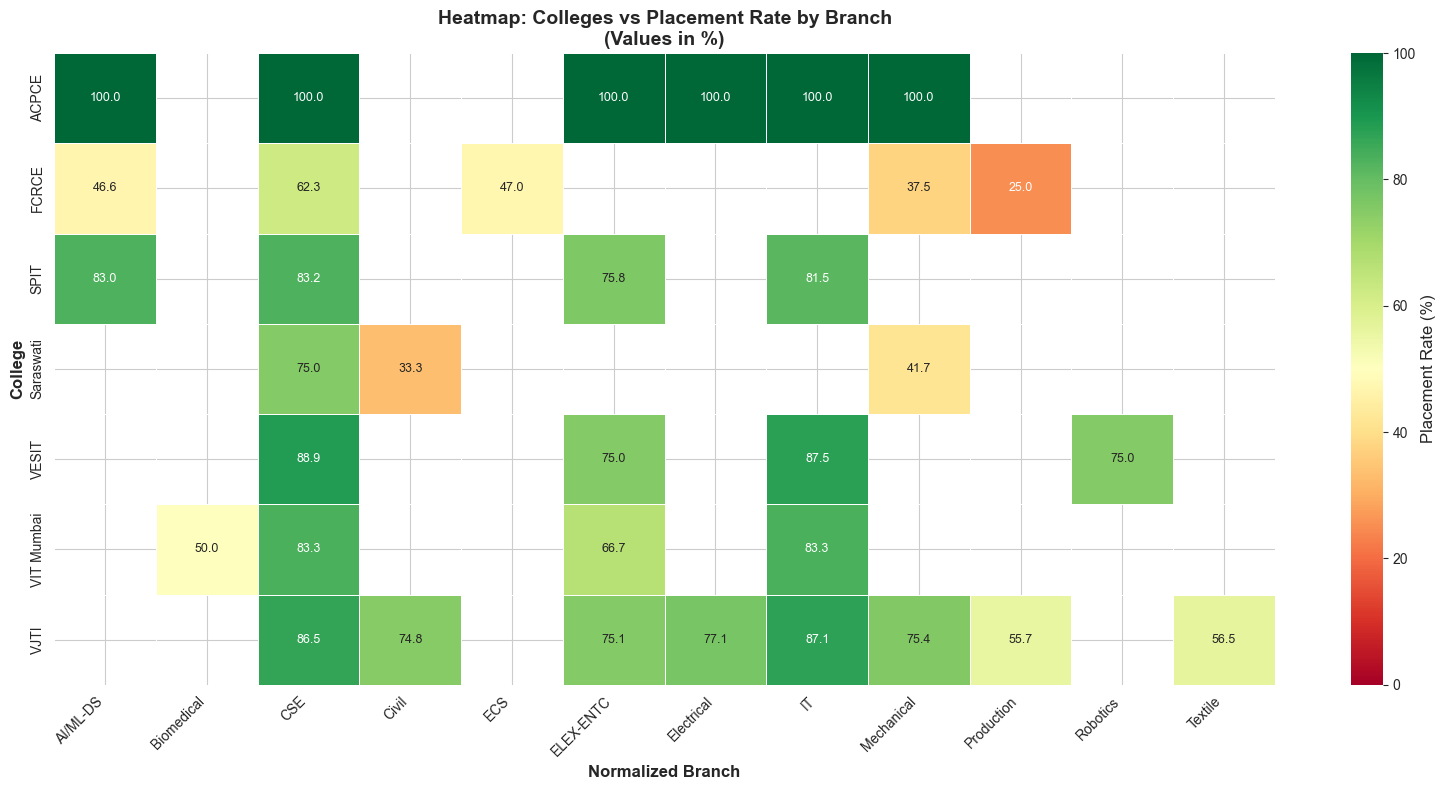


🟢 Green = High placement rate (good)
🔴 Red = Low placement rate (needs improvement)


In [11]:
# Create pivot table for placement rate heatmap
heatmap_rate = df_branches.groupby(['College', 'Normalized_Branch']).agg({
    'Total_Students': 'sum',
    'Placed_Students': 'sum'
}).reset_index()

heatmap_rate['Placement_Rate'] = (heatmap_rate['Placed_Students'] / heatmap_rate['Total_Students']) * 100
heatmap_rate_pivot = heatmap_rate.pivot(index='College', columns='Normalized_Branch', values='Placement_Rate')

# Create heatmap
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(heatmap_rate_pivot, annot=True, fmt='.1f', cmap='RdYlGn', 
            linewidths=0.5, linecolor='white', ax=ax, 
            cbar_kws={'label': 'Placement Rate (%)'},
            annot_kws={'size': 9}, vmin=0, vmax=100)

ax.set_title('Heatmap: Colleges vs Placement Rate by Branch\n(Values in %)', fontsize=14, fontweight='bold')
ax.set_xlabel('Normalized Branch', fontsize=12, fontweight='bold')
ax.set_ylabel('College', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('outputs/08_heatmap_colleges_vs_placement_rate.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🟢 Green = High placement rate (good)")
print("🔴 Red = Low placement rate (needs improvement)")

---
## 9. Pie/Donut Charts – Branch Distribution per College
For each college, show share of Total Students per branch.

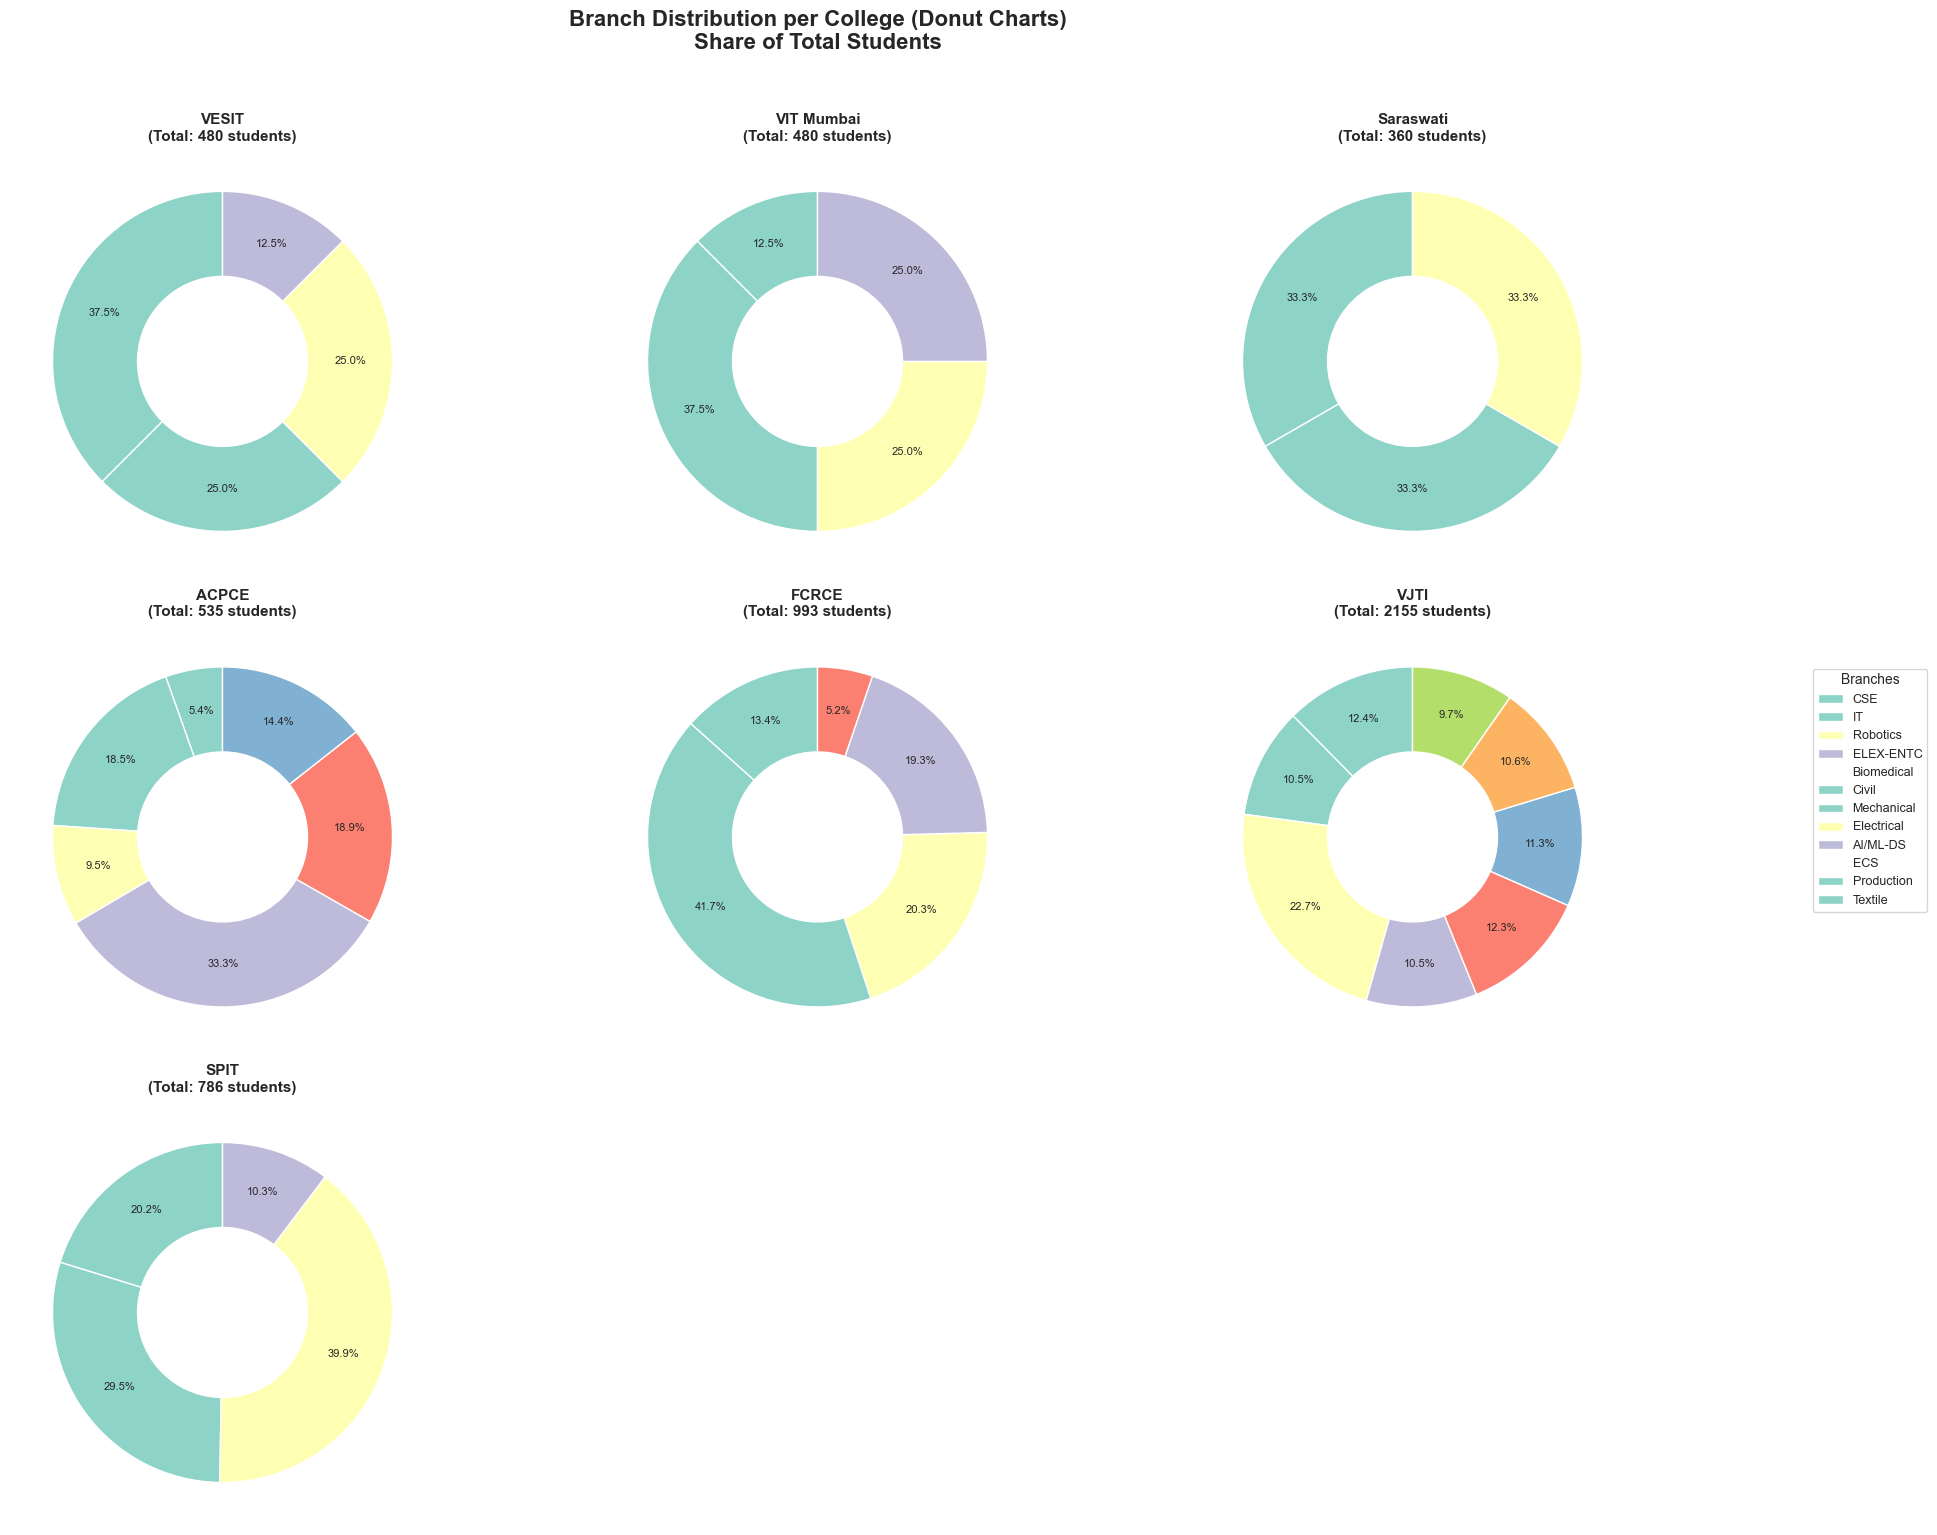


🍩 Each donut shows the proportion of students in each branch for that college.


In [12]:
# Get unique colleges
colleges = df_branches['College'].unique()

# Create subplots for donut charts
n_cols = 3
n_rows = (len(colleges) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

colors = plt.cm.Set3(np.linspace(0, 1, 15))

for i, college in enumerate(colleges):
    college_data = df_branches[df_branches['College'] == college].groupby('Normalized_Branch')['Total_Students'].sum()
    
    # Create donut chart
    wedges, texts, autotexts = axes[i].pie(college_data.values, labels=None, autopct='%1.1f%%',
                                           startangle=90, colors=colors[:len(college_data)],
                                           pctdistance=0.75, wedgeprops=dict(width=0.5, edgecolor='white'))
    
    # Add center circle for donut effect
    centre_circle = plt.Circle((0, 0), 0.40, fc='white')
    axes[i].add_artist(centre_circle)
    
    axes[i].set_title(f'{college}\n(Total: {college_data.sum()} students)', fontsize=11, fontweight='bold')
    
    # Adjust text size
    for autotext in autotexts:
        autotext.set_fontsize(8)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Create legend for all branches
all_branches = df_branches['Normalized_Branch'].unique()
fig.legend(all_branches, title='Branches', loc='center right', bbox_to_anchor=(1.12, 0.5), fontsize=9)

plt.suptitle('Branch Distribution per College (Donut Charts)\nShare of Total Students', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('outputs/09_branch_distribution_donut.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🍩 Each donut shows the proportion of students in each branch for that college.")

---
## 10. Stacked Bar Chart – Total Students vs Placed Students
For each branch, show total vs placed in a stacked bar.

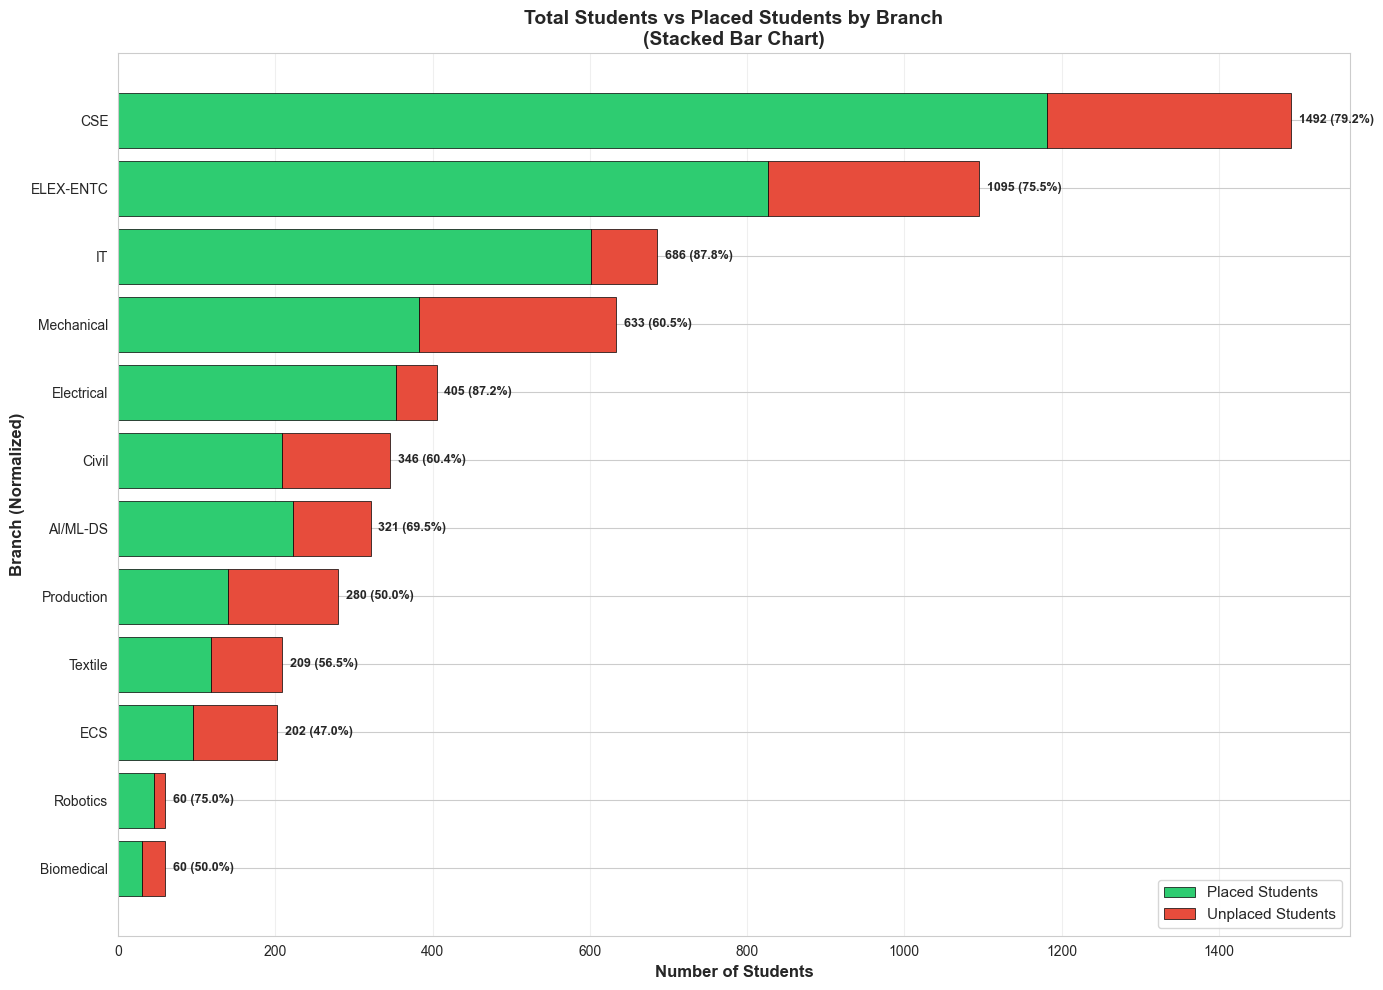


🟢 Green = Placed Students
🔴 Red = Unplaced Students


In [13]:
# Aggregate by branch
stacked_data = df_branches.groupby('Normalized_Branch').agg({
    'Total_Students': 'sum',
    'Placed_Students': 'sum'
}).reset_index()

stacked_data['Unplaced_Students'] = stacked_data['Total_Students'] - stacked_data['Placed_Students']
stacked_data = stacked_data.sort_values('Total_Students', ascending=True)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Plot placed students (bottom)
bars1 = ax.barh(stacked_data['Normalized_Branch'], stacked_data['Placed_Students'], 
                color='#2ecc71', label='Placed Students', edgecolor='black', linewidth=0.5)

# Plot unplaced students (stacked on top)
bars2 = ax.barh(stacked_data['Normalized_Branch'], stacked_data['Unplaced_Students'], 
                left=stacked_data['Placed_Students'], color='#e74c3c', 
                label='Unplaced Students', edgecolor='black', linewidth=0.5)

# Add total labels
for i, (idx, row) in enumerate(stacked_data.iterrows()):
    ax.text(row['Total_Students'] + 10, i, f"{int(row['Total_Students'])} ({row['Placed_Students']/row['Total_Students']*100:.1f}%)", 
            va='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Number of Students', fontsize=12, fontweight='bold')
ax.set_ylabel('Branch (Normalized)', fontsize=12, fontweight='bold')
ax.set_title('Total Students vs Placed Students by Branch\n(Stacked Bar Chart)', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/10_stacked_bar_total_vs_placed.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🟢 Green = Placed Students")
print("🔴 Red = Unplaced Students")

---
## 11. Top 3 Best Branches per College
Based on: Highest Avg Package & Highest Placement Rate

TOP 3 BRANCHES PER COLLEGE - BY AVERAGE PACKAGE (LPA)

🏫 VESIT:
   1. CSE: ₹9.50 LPA
   2. IT: ₹8.50 LPA
   3. ELEX-ENTC: ₹6.50 LPA

🏫 VIT Mumbai:
   1. CSE: ₹6.50 LPA
   2. IT: ₹6.00 LPA
   3. ELEX-ENTC: ₹5.00 LPA

🏫 Saraswati:
   1. CSE: ₹4.80 LPA
   2. Mechanical: ₹3.50 LPA
   3. Civil: ₹3.20 LPA

🏫 ACPCE:
   1. AI/ML-DS: ₹4.19 LPA
   2. IT: ₹3.98 LPA
   3. CSE: ₹3.80 LPA

🏫 FCRCE:
   1. AI/ML-DS: ₹6.58 LPA
   2. CSE: ₹6.48 LPA
   3. ECS: ₹6.48 LPA

🏫 VJTI:
   1. CSE: ₹18.18 LPA
   2. IT: ₹16.58 LPA
   3. ELEX-ENTC: ₹12.61 LPA

🏫 SPIT:
   1. CSE: ₹17.52 LPA
   2. IT: ₹16.11 LPA
   3. AI/ML-DS: ₹14.93 LPA

TOP 3 BRANCHES PER COLLEGE - BY PLACEMENT RATE (%)

🏫 VESIT:
   1. CSE: 88.9%
   2. IT: 87.5%
   3. ELEX-ENTC: 75.0%

🏫 VIT Mumbai:
   1. CSE: 83.3%
   2. IT: 83.3%
   3. ELEX-ENTC: 66.7%

🏫 Saraswati:
   1. CSE: 75.0%
   2. Mechanical: 41.7%
   3. Civil: 33.3%

🏫 ACPCE:
   1. AI/ML-DS: 100.0%
   2. CSE: 100.0%
   3. ELEX-ENTC: 100.0%

🏫 FCRCE:
   1. CSE: 62.3%
   2. ECS: 47.0%
   

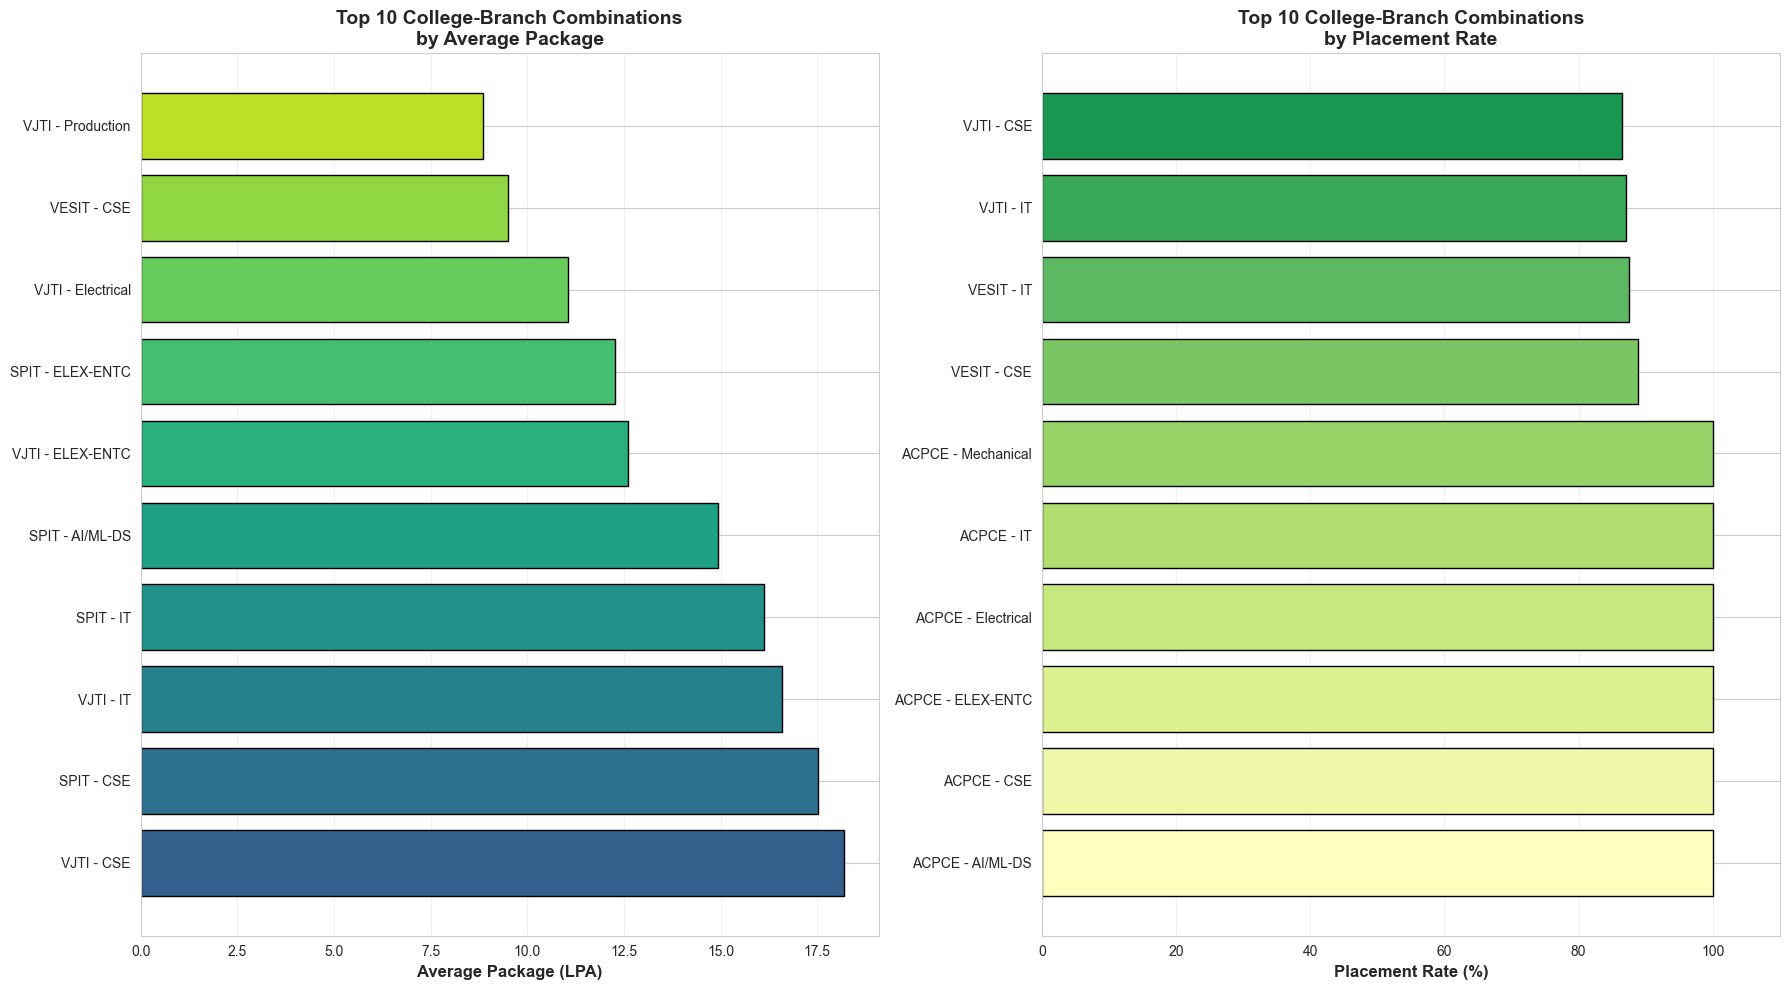

In [14]:
# Calculate metrics by college and branch
college_branch_stats = df_branches.groupby(['College', 'Normalized_Branch']).agg({
    'Total_Students': 'sum',
    'Placed_Students': 'sum',
    'Avg_Package_LPA': 'mean'
}).reset_index()

college_branch_stats['Placement_Rate'] = (college_branch_stats['Placed_Students'] / college_branch_stats['Total_Students']) * 100

# Function to get top 3 for each college
def get_top3_per_college(df, metric, ascending=False):
    return df.sort_values(['College', metric], ascending=[True, ascending]).groupby('College').head(3)

# Top 3 by Average Package
top3_package = get_top3_per_college(college_branch_stats, 'Avg_Package_LPA')

# Top 3 by Placement Rate
top3_rate = get_top3_per_college(college_branch_stats, 'Placement_Rate')

# Display as tables
print("="*80)
print("TOP 3 BRANCHES PER COLLEGE - BY AVERAGE PACKAGE (LPA)")
print("="*80)
for college in df_branches['College'].unique():
    college_data = top3_package[top3_package['College'] == college][['Normalized_Branch', 'Avg_Package_LPA']]
    if len(college_data) > 0:
        print(f"\n🏫 {college}:")
        for rank, (_, row) in enumerate(college_data.iterrows(), 1):
            print(f"   {rank}. {row['Normalized_Branch']}: ₹{row['Avg_Package_LPA']:.2f} LPA")

print("\n" + "="*80)
print("TOP 3 BRANCHES PER COLLEGE - BY PLACEMENT RATE (%)")
print("="*80)
for college in df_branches['College'].unique():
    college_data = top3_rate[top3_rate['College'] == college][['Normalized_Branch', 'Placement_Rate']]
    if len(college_data) > 0:
        print(f"\n🏫 {college}:")
        for rank, (_, row) in enumerate(college_data.iterrows(), 1):
            print(f"   {rank}. {row['Normalized_Branch']}: {row['Placement_Rate']:.1f}%")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot 1: Top branches by package
top_overall_pkg = college_branch_stats.nlargest(10, 'Avg_Package_LPA')
top_overall_pkg['Label'] = top_overall_pkg['College'] + ' - ' + top_overall_pkg['Normalized_Branch']
axes[0].barh(top_overall_pkg['Label'], top_overall_pkg['Avg_Package_LPA'], color=plt.cm.viridis(np.linspace(0.3, 0.9, 10)), edgecolor='black')
axes[0].set_xlabel('Average Package (LPA)', fontweight='bold')
axes[0].set_title('Top 10 College-Branch Combinations\nby Average Package', fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Top branches by placement rate
top_overall_rate = college_branch_stats.nlargest(10, 'Placement_Rate')
top_overall_rate['Label'] = top_overall_rate['College'] + ' - ' + top_overall_rate['Normalized_Branch']
axes[1].barh(top_overall_rate['Label'], top_overall_rate['Placement_Rate'], color=plt.cm.RdYlGn(np.linspace(0.5, 0.9, 10)), edgecolor='black')
axes[1].set_xlabel('Placement Rate (%)', fontweight='bold')
axes[1].set_title('Top 10 College-Branch Combinations\nby Placement Rate', fontweight='bold')
axes[1].set_xlim(0, 110)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/11_top3_branches_per_college.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 12. Combined KPI Dashboard Summary
For each college, show: Total Students, Placed Students, Placement Rate, Average Package

                    COMBINED KPI DASHBOARD SUMMARY
College          Total Students   Placed Students    Placement Rate     Avg Package
----------------------------------------------------------------------------------------------------
ACPCE                       535               535           100.00%           3.73 LPA
VESIT                       480               400            83.33%           7.62 LPA
SPIT                        786               629            80.03%          14.72 LPA
VIT Mumbai                  480               360            75.00%           5.50 LPA
VJTI                      2,155             1,602            74.34%          11.48 LPA
FCRCE                       993               500            50.35%           6.48 LPA
Saraswati                   360               180            50.00%           3.83 LPA
----------------------------------------------------------------------------------------------------
TOTAL                     5,789             4,206     

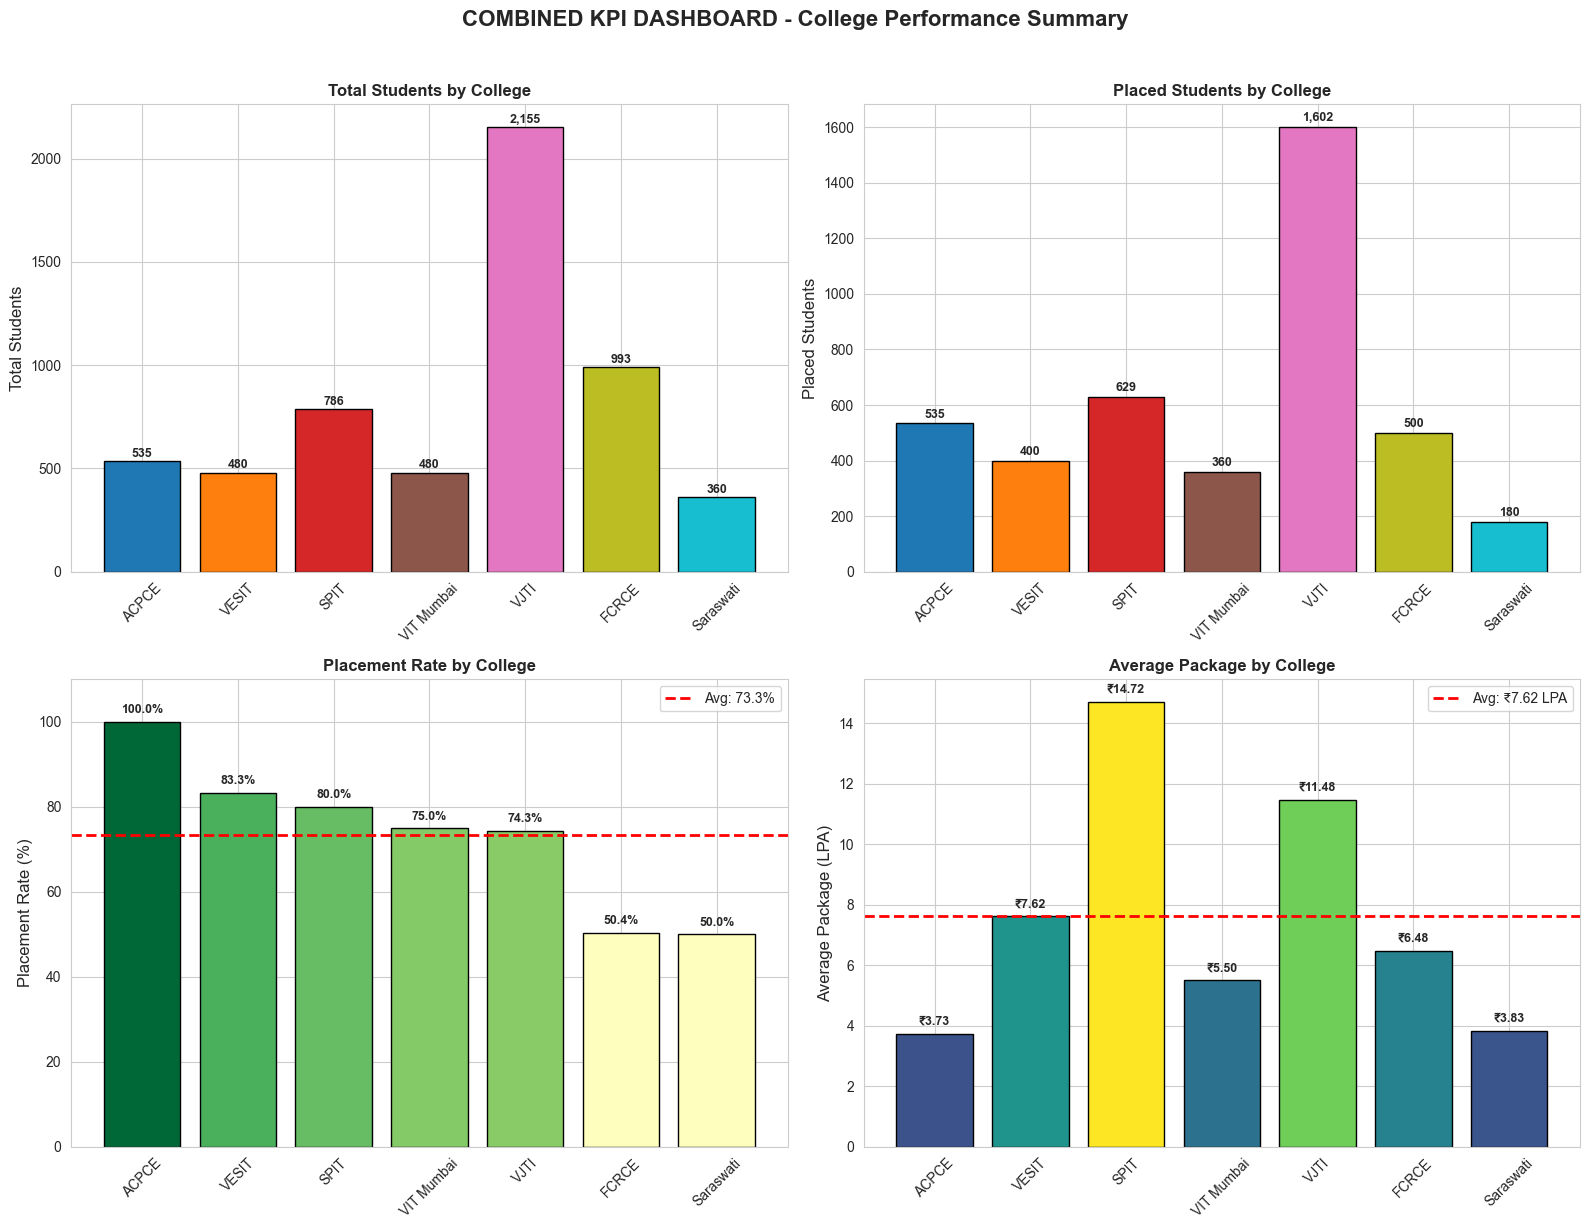


✅ KPI Summary saved to outputs/kpi_summary.csv


In [15]:
# Create KPI summary table
kpi_summary = df_branches.groupby('College').agg({
    'Total_Students': 'sum',
    'Placed_Students': 'sum',
    'Avg_Package_LPA': 'mean'
}).reset_index()

kpi_summary['Placement_Rate'] = (kpi_summary['Placed_Students'] / kpi_summary['Total_Students']) * 100
kpi_summary = kpi_summary.round(2)
kpi_summary = kpi_summary.sort_values('Placement_Rate', ascending=False)

# Display table
print("="*100)
print("                    COMBINED KPI DASHBOARD SUMMARY")
print("="*100)
print(f"{'College':<15} {'Total Students':>15} {'Placed Students':>17} {'Placement Rate':>17} {'Avg Package':>15}")
print("-"*100)
for _, row in kpi_summary.iterrows():
    print(f"{row['College']:<15} {int(row['Total_Students']):>15,} {int(row['Placed_Students']):>17,} {row['Placement_Rate']:>16.2f}% {row['Avg_Package_LPA']:>14.2f} LPA")
print("-"*100)

# Overall totals
print(f"{'TOTAL':<15} {int(kpi_summary['Total_Students'].sum()):>15,} {int(kpi_summary['Placed_Students'].sum()):>17,} {(kpi_summary['Placed_Students'].sum()/kpi_summary['Total_Students'].sum()*100):>16.2f}% {kpi_summary['Avg_Package_LPA'].mean():>14.2f} LPA")
print("="*100)

# Create KPI visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Color palette
colors = plt.cm.tab10(np.linspace(0, 1, len(kpi_summary)))

# 1. Total Students by College
bars1 = axes[0, 0].bar(kpi_summary['College'], kpi_summary['Total_Students'], color=colors, edgecolor='black')
axes[0, 0].set_title('Total Students by College', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Total Students')
axes[0, 0].tick_params(axis='x', rotation=45)
for bar in bars1:
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, f'{int(bar.get_height()):,}', ha='center', fontsize=9, fontweight='bold')

# 2. Placed Students by College
bars2 = axes[0, 1].bar(kpi_summary['College'], kpi_summary['Placed_Students'], color=colors, edgecolor='black')
axes[0, 1].set_title('Placed Students by College', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Placed Students')
axes[0, 1].tick_params(axis='x', rotation=45)
for bar in bars2:
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, f'{int(bar.get_height()):,}', ha='center', fontsize=9, fontweight='bold')

# 3. Placement Rate by College
bars3 = axes[1, 0].bar(kpi_summary['College'], kpi_summary['Placement_Rate'], 
                       color=plt.cm.RdYlGn(kpi_summary['Placement_Rate']/100), edgecolor='black')
axes[1, 0].set_title('Placement Rate by College', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Placement Rate (%)')
axes[1, 0].set_ylim(0, 110)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].axhline(y=kpi_summary['Placement_Rate'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {kpi_summary["Placement_Rate"].mean():.1f}%')
axes[1, 0].legend()
for bar in bars3:
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{bar.get_height():.1f}%', ha='center', fontsize=9, fontweight='bold')

# 4. Average Package by College
bars4 = axes[1, 1].bar(kpi_summary['College'], kpi_summary['Avg_Package_LPA'], 
                       color=plt.cm.viridis(kpi_summary['Avg_Package_LPA']/kpi_summary['Avg_Package_LPA'].max()), edgecolor='black')
axes[1, 1].set_title('Average Package by College', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Package (LPA)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=kpi_summary['Avg_Package_LPA'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: ₹{kpi_summary["Avg_Package_LPA"].mean():.2f} LPA')
axes[1, 1].legend()
for bar in bars4:
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f'₹{bar.get_height():.2f}', ha='center', fontsize=9, fontweight='bold')

plt.suptitle('COMBINED KPI DASHBOARD - College Performance Summary', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('outputs/12_kpi_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

# Save KPI summary as CSV
kpi_summary.to_csv('outputs/kpi_summary.csv', index=False)
print("\n✅ KPI Summary saved to outputs/kpi_summary.csv")

---
## Summary: All Visualizations Saved

All visualizations have been saved to the `outputs/` folder:

1. `01_placement_rate_by_field.png` - Placement Rate by Field
2. `02_avg_package_by_field.png` - Average Package by Field
3. `03_college_wise_placement_rate.png` - College-wise Grouped Bar Chart
4. `04_yearwise_trend.png` - Year-wise Trends
5. `05_field_popularity_vs_placement.png` - Scatter Plot
6. `06_avg_package_trend_by_college.png` - Package Trend Line Chart
7. `07_heatmap_colleges_vs_package.png` - Package Heatmap
8. `08_heatmap_colleges_vs_placement_rate.png` - Placement Rate Heatmap
9. `09_branch_distribution_donut.png` - Donut Charts per College
10. `10_stacked_bar_total_vs_placed.png` - Stacked Bar Chart
11. `11_top3_branches_per_college.png` - Top Branches Analysis
12. `12_kpi_dashboard.png` - Combined KPI Dashboard
13. `kpi_summary.csv` - KPI Summary Table

In [16]:
# List all saved files
import os

print("📁 Files saved in outputs/ folder:")
print("="*50)
for file in sorted(os.listdir('outputs')):
    filepath = os.path.join('outputs', file)
    size = os.path.getsize(filepath) / 1024  # KB
    print(f"  ✓ {file} ({size:.1f} KB)")

print("\n✅ All visualizations generated and saved successfully!")

📁 Files saved in outputs/ folder:
  ✓ 01_placement_rate_by_field.png (85.4 KB)
  ✓ 02_avg_package_by_field.png (98.0 KB)
  ✓ 03_college_wise_placement_rate.png (78.3 KB)
  ✓ 04_yearwise_trend.png (138.7 KB)
  ✓ 05_field_popularity_vs_placement.png (103.0 KB)
  ✓ 06_avg_package_trend_by_college.png (86.2 KB)
  ✓ 07_heatmap_colleges_vs_package.png (122.3 KB)
  ✓ 08_heatmap_colleges_vs_placement_rate.png (112.5 KB)
  ✓ 09_branch_distribution_donut.png (282.4 KB)
  ✓ 10_stacked_bar_total_vs_placed.png (104.0 KB)
  ✓ 11_top3_branches_per_college.png (91.8 KB)
  ✓ 12_kpi_dashboard.png (182.8 KB)
  ✓ kpi_summary.csv (0.3 KB)

✅ All visualizations generated and saved successfully!
